# Apartat (B): Classificació Numèrica (6pts)

### 1. EDA (exploratory data analysis)

In [1]:
# afegim llibreries necessaries
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import sklearn
from sklearn.preprocessing import PolynomialFeatures

# visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# llegim les dades del csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 
dataset = load_dataset('water_potability.csv')
data = dataset.values

In [2]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890,20791.319,7.300,368.516,564.309,10.380,86.991,2.963,0
1,3.716,129.423,18630.058,6.635,NaN,592.885,15.180,56.329,4.501,0
2,8.099,224.236,19909.542,9.276,NaN,418.606,16.869,66.420,3.056,0
3,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
4,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668,193.682,47580.992,7.167,359.949,526.424,13.894,66.688,4.436,1
3272,7.809,193.553,17329.802,8.061,NaN,392.450,19.903,NaN,2.798,1
3273,9.420,175.763,33155.578,7.350,NaN,432.045,11.039,69.845,3.299,1
3274,5.127,230.604,11983.869,6.303,NaN,402.883,11.169,77.488,4.709,1


In [3]:
print("Dimensió base de dades: ", dataset.shape)
print("Número de atributs: ", dataset.columns.size)

Dimensió base de dades:  (3276, 10)
Número de atributs:  10


In [4]:
print("Tipus d'atributs:")
dataset.dtypes

Tipus d'atributs:


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
#categoria1 = dataset[dataset.Potability == 0]
#categoria2 = dataset[dataset.Potability == 1]
#print("Categoria 1: ", categoria1["Potability"].count())
#print("Categoria 2: ", categoria2["Potability"].count())

target = pd.Index(dataset['Potability'])
target.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

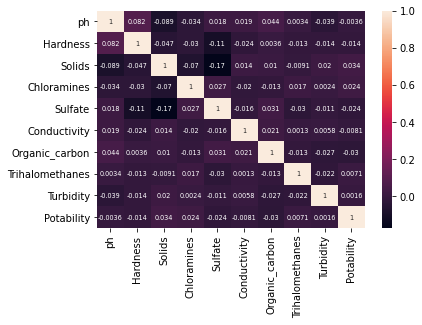

In [6]:
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 6.5})

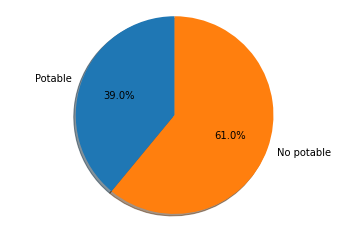

In [7]:
potable = dataset[dataset.Potability == 1]
noPotable = dataset[dataset.Potability == 0]

fig,ax1 = plt.subplots()
labels = 'Potable', 'No potable'
ax1.pie([potable.shape[0],noPotable.shape[0]], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### 2. Prepocessing (normalitzation, outlier removal, feature selection..)

In [8]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [3]:
dataset['ph'].fillna(value=dataset['ph'].median(),inplace=True)
dataset['Sulfate'].fillna(value=dataset['Sulfate'].median(),inplace=True)
dataset['Trihalomethanes'].fillna(value=dataset['Trihalomethanes'].median(),inplace=True)

In [4]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp.fit(([[1, 2, 3, 4, 5, 6, 7, np.nan, 9, 10], [np.nan, 3, 3, 4, 5, 6, 7, 8, 9, 10], [7, np.nan, 3, 4, 5, 6, 7, 8, 9, 10]]))
#SimpleImputer()
#X = dataset 
#print(imp.transform(X))
#lo de los nans el enunciado pone que se puede hacer con esto pero no he consrguido que funcione y he encontrado eso de fillna

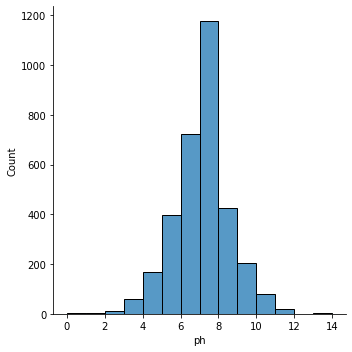

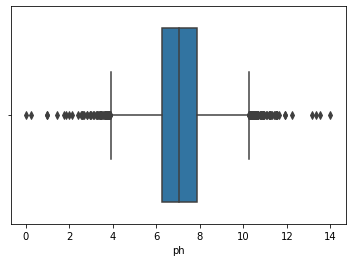

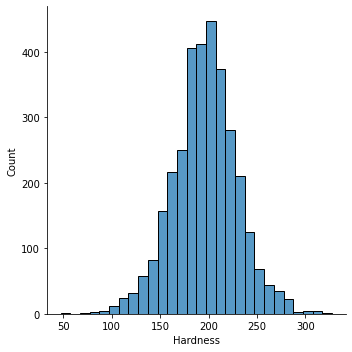

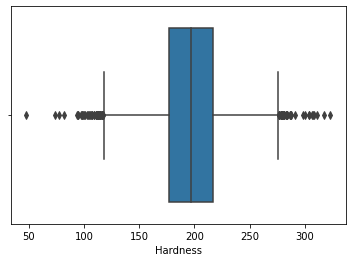

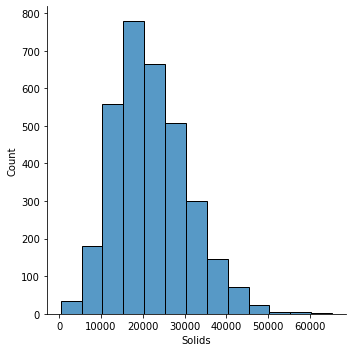

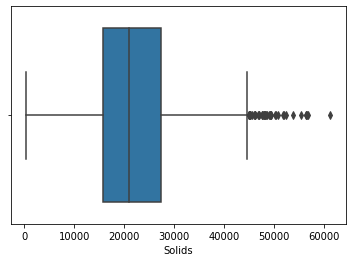

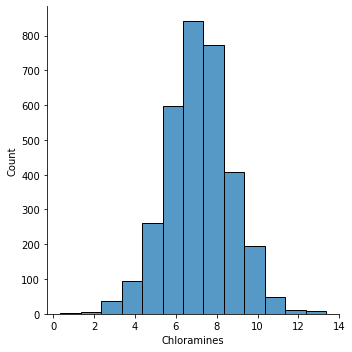

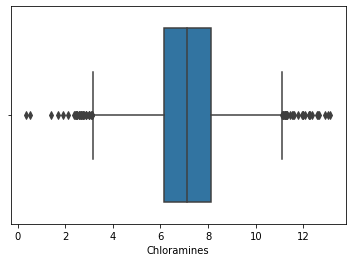

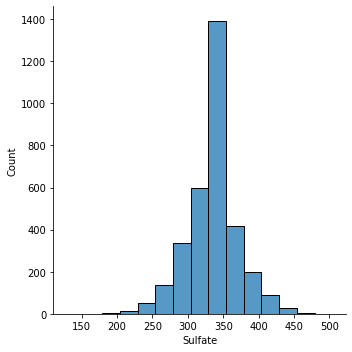

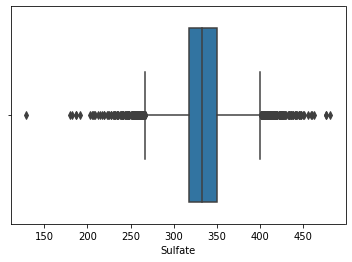

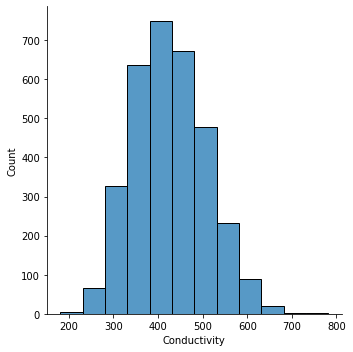

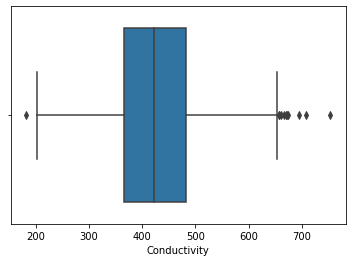

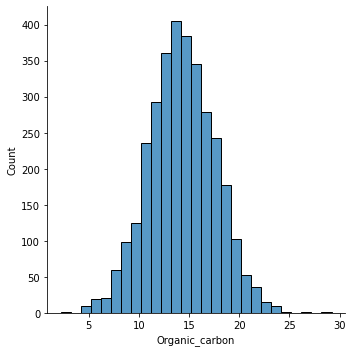

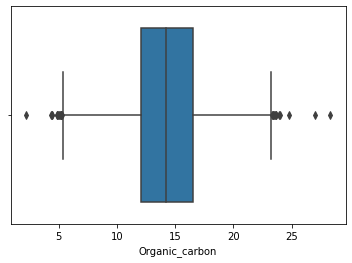

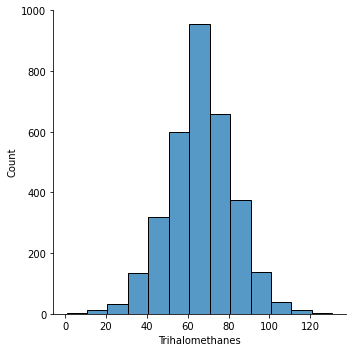

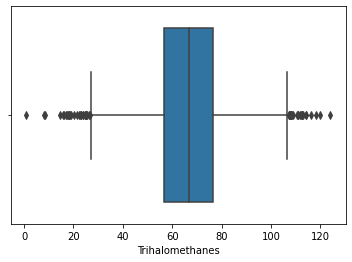

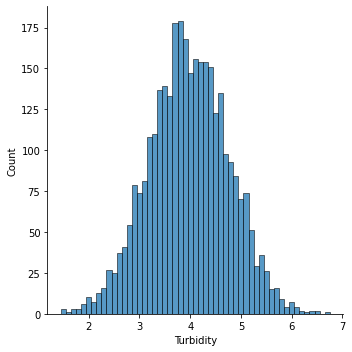

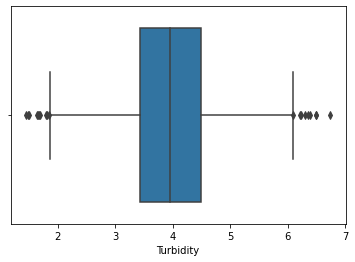

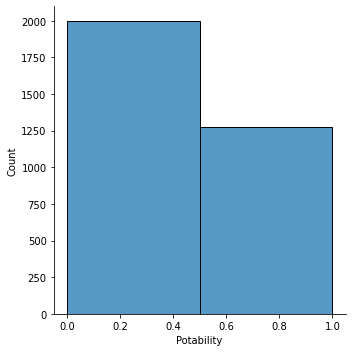

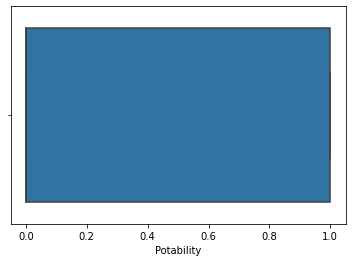

In [14]:
import warnings 
warnings.filterwarnings('ignore')
#outlier visualitzation
sns.displot(dataset['ph'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['ph'])
plt.show()

sns.displot(dataset['Hardness'], binwidth=10, multiple="stack")
plt.show()
sns.boxplot(dataset['Hardness'])
plt.show()

sns.displot(dataset['Solids'], binwidth=5000, multiple="stack")
plt.show()
sns.boxplot(dataset['Solids'])
plt.show()

sns.displot(dataset['Chloramines'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['Chloramines'])
plt.show()

sns.displot(dataset['Sulfate'], binwidth=25, multiple="stack")
plt.show()
sns.boxplot(dataset['Sulfate'])
plt.show()

sns.displot(dataset['Conductivity'], binwidth=50, multiple="stack")
plt.show()
sns.boxplot(dataset['Conductivity'])
plt.show()

sns.displot(dataset['Organic_carbon'], binwidth=1, multiple="stack")
plt.show()
sns.boxplot(dataset['Organic_carbon'])
plt.show()

sns.displot(dataset['Trihalomethanes'], binwidth=10, multiple="stack")
plt.show()
sns.boxplot(dataset['Trihalomethanes'])
plt.show()

sns.displot(dataset['Turbidity'], binwidth=0.1, multiple="stack")
plt.show()
sns.boxplot(dataset['Turbidity'])
plt.show()

sns.displot(dataset['Potability'], binwidth=0.5, multiple="stack")
plt.show()
sns.boxplot(dataset['Potability'])
plt.show()


In [5]:
#remove outliers
data = dataset.values
dataRemove = data[(data[:,0] > 2) & (data[:,0] < 12) & (data[:,1] > 100) & (data[:,1] < 300) & (data[:,2] < 45000) & (data[:,3] > 2.5) & (data[:,3] < 12.5) & (data[:,4] > 200) & (data[:,4] < 470) & (data[:,5] > 220) & (data[:,5] < 680) & (data[:,6] > 3) & (data[:,6] < 26) & (data[:,7] > 10) & (data[:,7] < 120) & (data[:,8] > 2) & (data[:,8] < 6)]


In [6]:
#normalitzacio de dades utilitzant preprocessing

x = dataRemove[:,[0,1,2,3,4,5,6,7,8]]
y = dataRemove[:,9]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=39) #39

scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)

print(x_scaled)


[[ 1.15308474  0.72451032 -0.63589605 ... -2.14591847  0.43941078
   0.95341584]
 [ 0.21885873  1.32135965 -0.59857392 ... -0.32300879  1.69818637
   1.4138211 ]
 [-0.99130359 -0.26224739  1.71728876 ...  0.20992723  0.00705688
  -2.20227786]
 ...
 [-0.94486423  0.3708063  -0.27856956 ...  0.39414848  1.0185205
  -0.59783599]
 [-0.2768668   2.40999323 -0.33631899 ...  1.79075578  0.57285583
   1.65249826]
 [ 0.95871888 -0.34088676 -1.04552195 ...  0.88436234 -1.14257377
  -0.02135997]]


In [7]:
poly = PolynomialFeatures(2)
polyDataset = poly.fit_transform(dataset)
polyDataset.shape
# se haria del dataset normal o del normalizado??

(3276, 66)

In [33]:
# prueba de polinomi
from pandas import read_csv
from pandas import DataFrame
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
print(dataset.shape)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.shape)

(208, 61)
(208, 1891)


In [21]:
# probar cross-validation en els diferents models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.special import expit

## LOGISTIC REGRESION

# separem les dades en train i test
x = dataRemove[:,[0,1,2,3,4,5,6,7,8]]
y = dataRemove[:,9]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=39) #39

# creem el regresor logistic
log_reg = LogisticRegression()
# entrenem el regresor logistic amb les dades de train
log_reg.fit(x_train, y_train)


print("Logistic Regression Score: ", log_reg.score(x_test, y_test)) # retorna la prescisio del model, com de bo ha sigut
print("Logistic Regression Cross Val Score: ", np.mean(cross_val_score(log_reg, x, y, cv=5))) # evalua els resultats del model utilitzat


Logistic Regression Score:  0.634185303514377
Logistic Regression Cross Val Score:  0.6178913738019169
